### ___Top 20 pesquisadores da UFRN que escreveram sobre o SARS, com mais interações. [período 2020-2024]___

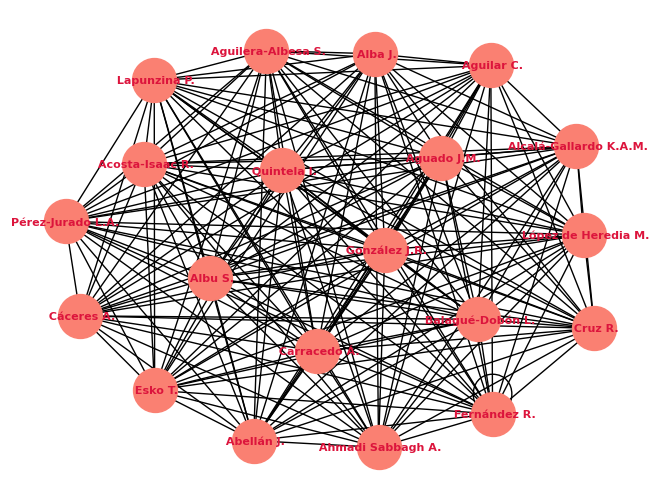

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


df = pd.read_csv('scopus.csv')

G = nx.Graph()

# Itere sobre as linhas do DataFrame.
for index, row in df.iterrows():
    # Obtenha a lista de autores para esta linha.
    authors = row['Authors'].split(';')

    # Adicione uma aresta entre cada par de autores nesta linha.
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j])

# Conte o número de conexões para cada autor (grau do nó)
degree_centrality = nx.degree_centrality(G)

# Ordene os autores pelo grau de centralidade (número de conexões) em ordem decrescente
sorted_authors = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Selecione os 20 autores com mais interações
top_20_authors = [author for author, _ in sorted_authors[:20]]

# Crie um subgrafo com os 20 autores mais conectados
subgraph = G.subgraph(top_20_authors)


# Calcula a posição dos nós usando o algoritmo Fruchterman-Reingold
pos = nx.spring_layout(subgraph, k=0.5, iterations=50)

# Desenhe o grafo com rótulos e cores
nx.draw(subgraph, pos, with_labels=True, font_size=8,font_color="Crimson",font_weight='bold',node_color="Salmon", node_size=1000) # Aumenta o tamanho dos nós e da fonte
plt.show()



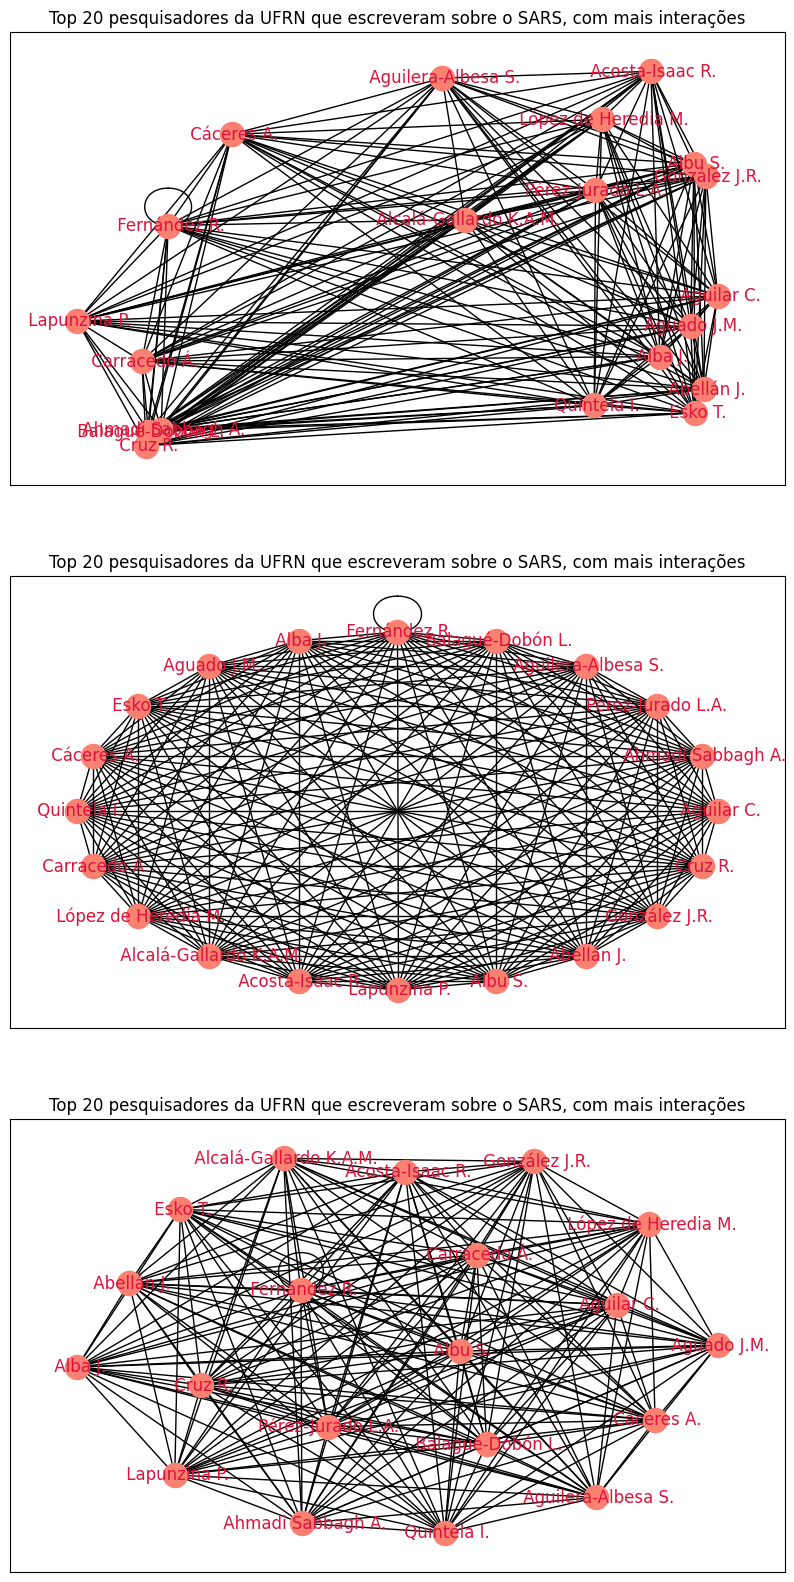

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, plot = plt.subplots(3,figsize=(10,20))
subplots = plot.reshape(1, 3)[0]

layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout)
titles = ("Top 20 pesquisadores da UFRN que escreveram sobre o SARS, com mais interações", "Top 20 pesquisadores da UFRN que escreveram sobre o SARS, com mais interações", "Top 20 pesquisadores da UFRN que escreveram sobre o SARS, com mais interações")

for plot, layout, title in zip(subplots, layouts, titles):
  pos = layout(subgraph)
  nx.draw_networkx(subgraph, pos=pos, ax=plot,with_labels=True, font_color="Crimson",node_color="Salmon")
  plot.set_title(title)
  plot.axis("on")

plt.show()


In [10]:
# Calcula a densidade da rede
density = nx.density(graph)

# Imprime a densidade
print(f"Densidade da rede: {density}")

Densidade da rede: 0.13921452257694258


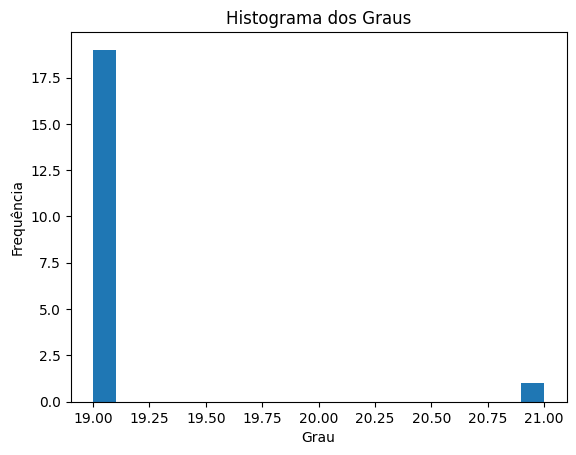

In [27]:
degrees = [degree for node, degree in subgraph.degree()]
plt.hist(degrees, bins=20)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma dos Graus')
plt.show()